We want to build a Decision Tree whether a pet is cat or dog based on height and weight.We could divide these data points on certain values of one of the two characteristics (height and weight)?

In [50]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [51]:
#create the array including the data
data = [[8,8,'dog'],[50,40,'dog'],[8,9,'cat'],[15,12,'dog'],[9,9.8,'cat']]
print(data)
#generate a dataframe
df = pd.DataFrame(data,columns=['weight','height','label'])
df

[[8, 8, 'dog'], [50, 40, 'dog'], [8, 9, 'cat'], [15, 12, 'dog'], [9, 9.8, 'cat']]


,weight,height,label
0,8,8.0,dog
1,50,40.0,dog
2,8,9.0,cat
3,15,12.0,dog
4,9,9.8,cat


In [52]:
#defining the predictors
X = df[['weight','height']]
#defining the target
Y = df['label']

In [53]:
#initiating the model
dtree = DecisionTreeClassifier()
#fitting the model
dtree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
dtree.predict([[9,9.8]])

array(['cat'], dtype=object)

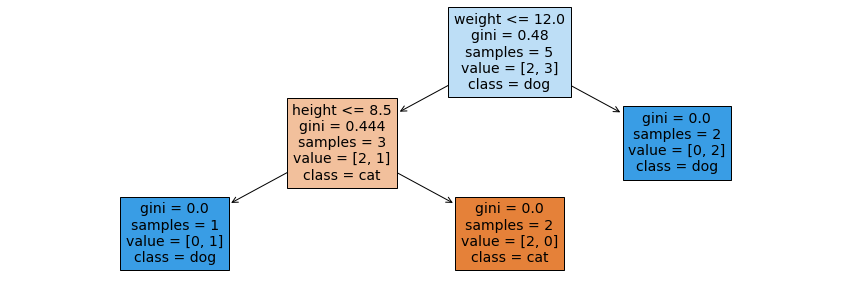

In [55]:
from sklearn import tree
tree.plot_tree(dtree,feature_names=X.columns,class_names=["cat","dog"],filled=True)
plt.show()

In [56]:
a = pd.read_csv("mushrooms.csv")
a.head()
#a.info()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [57]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [58]:
#Load the dataset
df= pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [60]:
def normalize(col):
  uniques = list(set(col))
  d = {u : i for (i,u) in enumerate(uniques)}
  for i in range(len(col)):
    col[i] = d[col[i]]
  return d
dicts = []
for i in range(len(df.columns)):
  dicts.append(normalize(df.values[:,i]))
print(dicts)

[{'p': 0, 'e': 1}, {'b': 0, 'f': 1, 'x': 2, 's': 3, 'c': 4, 'k': 5}, {'y': 0, 'f': 1, 's': 2, 'g': 3}, {'b': 0, 'w': 1, 'y': 2, 'p': 3, 'g': 4, 'u': 5, 'c': 6, 'e': 7, 'n': 8, 'r': 9}, {'f': 0, 't': 1}, {'a': 0, 'l': 1, 'f': 2, 'y': 3, 'p': 4, 's': 5, 'm': 6, 'c': 7, 'n': 8}, {'a': 0, 'f': 1}, {'c': 0, 'w': 1}, {'n': 0, 'b': 1}, {'b': 0, 'w': 1, 'h': 2, 'y': 3, 'p': 4, 'g': 5, 'u': 6, 'e': 7, 'n': 8, 'r': 9, 'o': 10, 'k': 11}, {'t': 0, 'e': 1}, {'b': 0, 'c': 1, 'e': 2, 'r': 3, '?': 4}, {'k': 0, 'y': 1, 'f': 2, 's': 3}, {'k': 0, 'y': 1, 'f': 2, 's': 3}, {'b': 0, 'w': 1, 'y': 2, 'p': 3, 'g': 4, 'c': 5, 'e': 6, 'n': 7, 'o': 8}, {'b': 0, 'w': 1, 'y': 2, 'p': 3, 'g': 4, 'c': 5, 'e': 6, 'n': 7, 'o': 8}, {'p': 0}, {'n': 0, 'o': 1, 'w': 2, 'y': 3}, {'n': 0, 'o': 1, 't': 2}, {'l': 0, 'f': 1, 'p': 2, 'e': 3, 'n': 4}, {'b': 0, 'w': 1, 'h': 2, 'y': 3, 'u': 4, 'n': 5, 'r': 6, 'o': 7, 'k': 8}, {'a': 0, 'y': 1, 's': 2, 'v': 3, 'c': 4, 'n': 5}, {'l': 0, 'w': 1, 'p': 2, 'g': 3, 'u': 4, 'm': 5, 'd': 6}]

In [61]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,2,8,1,4,1,0,0,11,...,3,1,1,0,2,1,2,8,2,4
1,1,2,2,2,1,0,1,0,1,11,...,3,1,1,0,2,1,2,5,5,3
2,1,0,2,1,1,1,1,0,1,8,...,3,1,1,0,2,1,2,5,5,5
3,0,2,0,1,1,4,1,0,0,8,...,3,1,1,0,2,1,2,8,2,4
4,1,2,2,4,0,8,1,1,1,11,...,3,1,1,0,2,1,3,5,0,3


In [62]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,2,8,1,4,1,0,0,11,...,3,1,1,0,2,1,2,8,2,4
1,1,2,2,2,1,0,1,0,1,11,...,3,1,1,0,2,1,2,5,5,3
2,1,0,2,1,1,1,1,0,1,8,...,3,1,1,0,2,1,2,5,5,5
3,0,2,0,1,1,4,1,0,0,8,...,3,1,1,0,2,1,2,8,2,4
4,1,2,2,4,0,8,1,1,1,11,...,3,1,1,0,2,1,3,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,5,2,8,0,8,0,0,1,3,...,3,8,8,0,1,1,2,0,4,0
8120,1,2,2,8,0,8,0,0,1,3,...,3,8,8,0,0,1,2,0,3,0
8121,1,1,2,8,0,8,0,0,1,8,...,3,8,8,0,1,1,2,0,4,0
8122,0,5,0,8,0,3,1,0,0,0,...,0,1,1,0,2,1,3,1,3,0


In [63]:
x = df.drop('class',axis=1)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,2,8,1,4,1,0,0,11,1,...,3,1,1,0,2,1,2,8,2,4
1,2,2,2,1,0,1,0,1,11,1,...,3,1,1,0,2,1,2,5,5,3
2,0,2,1,1,1,1,0,1,8,1,...,3,1,1,0,2,1,2,5,5,5
3,2,0,1,1,4,1,0,0,8,1,...,3,1,1,0,2,1,2,8,2,4
4,2,2,4,0,8,1,1,1,11,0,...,3,1,1,0,2,1,3,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,2,8,0,8,0,0,1,3,1,...,3,8,8,0,1,1,2,0,4,0
8120,2,2,8,0,8,0,0,1,3,1,...,3,8,8,0,0,1,2,0,3,0
8121,1,2,8,0,8,0,0,1,8,1,...,3,8,8,0,1,1,2,0,4,0
8122,5,0,8,0,3,1,0,0,0,0,...,0,1,1,0,2,1,3,1,3,0


In [64]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,2,8,1,4,1,0,0,11,...,3,1,1,0,2,1,2,8,2,4
1,1,2,2,2,1,0,1,0,1,11,...,3,1,1,0,2,1,2,5,5,3
2,1,0,2,1,1,1,1,0,1,8,...,3,1,1,0,2,1,2,5,5,5
3,0,2,0,1,1,4,1,0,0,8,...,3,1,1,0,2,1,2,8,2,4
4,1,2,2,4,0,8,1,1,1,11,...,3,1,1,0,2,1,3,5,0,3


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [66]:
#checking for null values
#df.isnull().sum()

In [67]:
X = df.values[:,1:]
print(X)

[[2 2 8 ... 8 2 4]
 [2 2 2 ... 5 5 3]
 [0 2 1 ... 5 5 5]
 ...
 [1 2 8 ... 0 4 0]
 [5 0 8 ... 1 3 0]
 [2 2 8 ... 7 4 0]]


In [68]:
Y = df.values[:,0]
print(Y)
Y = Y.astype("int")
print(Y)

[0 1 1 ... 1 0 1]
[0 1 1 ... 1 0 1]


In [69]:
Y

array([0, 1, 1, ..., 1, 0, 1])

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [71]:
gini_classifier = tree.DecisionTreeClassifier(criterion='gini',random_state=9,
                                              max_depth=4,min_samples_leaf=2)
entropy_classifier = tree.DecisionTreeClassifier(criterion='entropy',
                                                 random_state=100,max_depth=3,
                                                 min_samples_leaf=2)

In [72]:
gini_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

In [73]:
entropy_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [74]:
gini_predict = gini_classifier.predict(X_test)
entropy_predict = entropy_classifier.predict(X_test)

In [75]:
#Calculating accuracies
gini_accuracy = accuracy_score(y_test,gini_predict)*100
gini_accuracy

99.79491386382281

In [76]:
entropy_accuracy = accuracy_score(y_test,entropy_predict)*100
entropy_accuracy

99.4667760459393

In [77]:
a=25
print(a)
print("The value is",a)
print("The value is %d"%a)
print("The value is {}".format(a))
print(f'{a}') #f-string

25
The value is 25
The value is 25
The value is 25
25


In [79]:
print(f'Accuracy of Gini Classifier = {gini_accuracy}\n Accuracy of Entropy Classifer = {entropy_accuracy}')

Accuracy of Gini Classifier = 99.79491386382281
 Accuracy of Entropy Classifer = 99.4667760459393


In [ ]:
#print(classification_report(y_test,gini_predict))

In [ ]:
#print(classification_report(y_test,entropy_predict))

In [80]:
X[4]

array([2, 2, 4, 0, 8, 1, 1, 1, 11, 0, 2, 3, 3, 1, 1, 0, 2, 1, 3, 5, 0, 3],
      dtype=object)

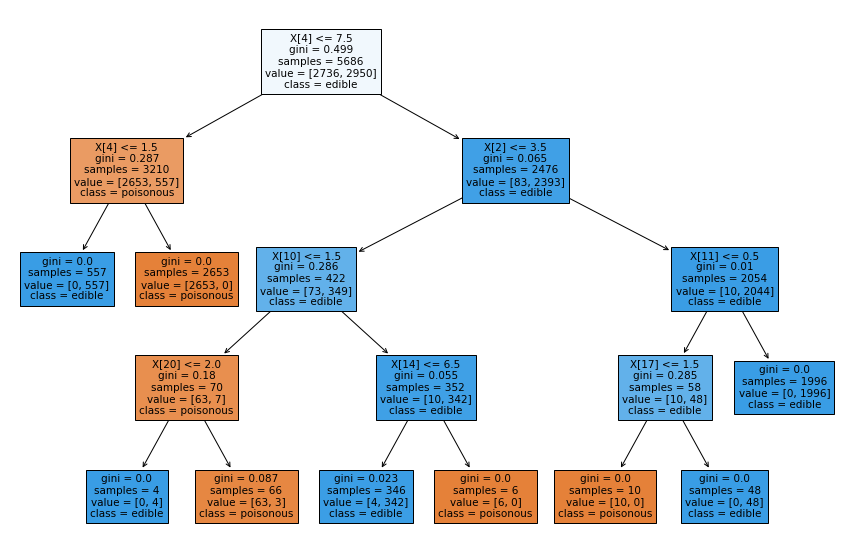

In [81]:
tree.plot_tree(gini_classifier,class_names=['poisonous','edible'],
               filled=True)
plt.show()

In [82]:
X

array([[2, 2, 8, ..., 8, 2, 4],
       [2, 2, 2, ..., 5, 5, 3],
       [0, 2, 1, ..., 5, 5, 5],
       ...,
       [1, 2, 8, ..., 0, 4, 0],
       [5, 0, 8, ..., 1, 3, 0],
       [2, 2, 8, ..., 7, 4, 0]], dtype=object)

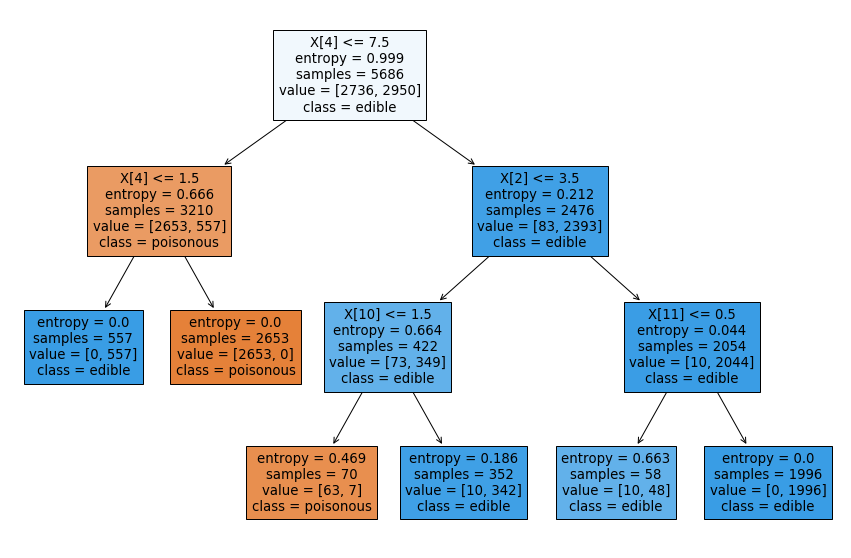

In [83]:
tree.plot_tree(entropy_classifier,class_names=['poisonous','edible'],filled=True)
plt.show()

In [84]:
##checking feature importance 
feature_importance = pd.DataFrame({'Features' :x.columns,
                                   'Importances':gini_classifier.feature_importances_})
feature_importance

,Features,Importances
0,cap-shape,0.000000
1,cap-surface,0.000000
2,cap-color,0.007004
3,bruises,0.000000
4,odor,0.948041
5,gill-attachment,0.000000
6,gill-spacing,0.000000
7,gill-size,0.000000
8,gill-color,0.000000
9,stalk-shape,0.000000


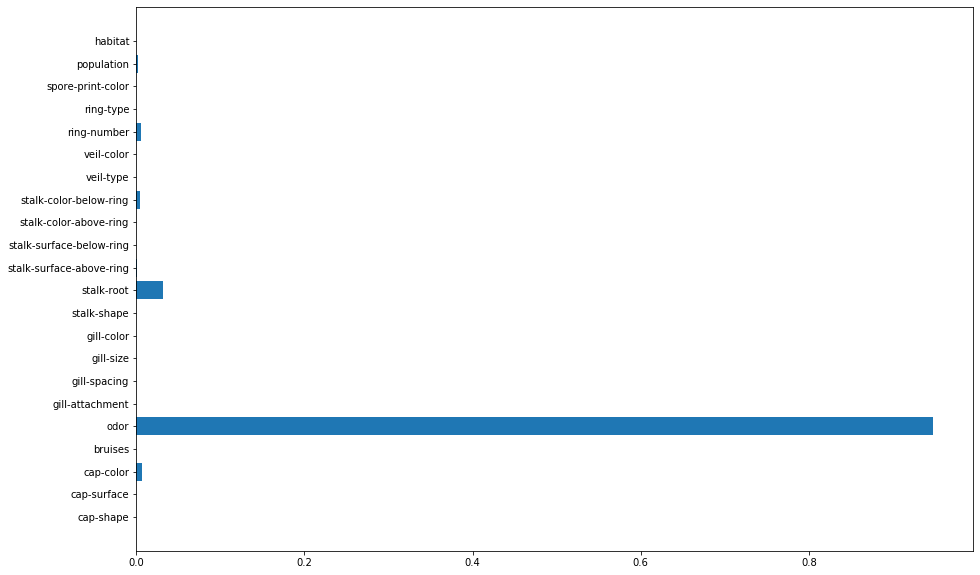

In [85]:
plt.barh(feature_importance['Features'],feature_importance['Importances'])
plt.show()